# **Price Catcher DOSM data catalogue (SSK 5251-1 Mini Project)**

Lokman Hakim Bin Muhamad (GS 65620) <p>
Muhammad Luqman Arif Bin Mohamad ( GS 66834 )
<p>
Link google colab : (https://colab.research.google.com/drive/1F5ZcXElu8qq-ubl2HCu6jYuei_T3qf9m?usp=sharing)


# Import the necessary libraries

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import f_oneway
import random

# Import the dataset from _DOSM website_

Firstly the data is imported from _DOSM'S OFFICIAL OPEN DATA PORTAL_ (https://open.dosm.gov.my/data-catalogue) and specific to the 'price catcher 2022' catalog. The price is seperated for each month so we used to do for looping for combining the data for a year 2022. The reason we combined is because we want to do the long term analaysis. So, we can get more information by analysis long term data compare only short period of data.

In [199]:
# Define an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through months from 1 to 12 (range 1-13 for a year 2022)
for month in range(1, 13):
    # Format the month with leading zero if necessary
    month_str = str(month).zfill(2) #extract only the last digits of the year

    # Create the URL for each month
    url = f'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-{month_str}.parquet'

    # Read data from URL
    data_month = pd.read_parquet(url)

    # Append data to the combined DataFrame
    data = data.append(data_month, ignore_index=True)

# Now combined_data contains information from all 12 months

<ipython-input-199-9b408f46f585>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-199-9b408f46f585>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-199-9b408f46f585>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-199-9b408f46f585>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-199-9b408f46f585>:16: FutureWarning: The frame.append method is deprecated and will be removed fr

In [200]:
data = data.dropna() #remove NaN value
data # display data the main data first

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.10
1,2022-01-01,2,9,36.00
2,2022-01-01,2,14,24.00
3,2022-01-01,2,16,4.30
4,2022-01-01,2,18,4.50
...,...,...,...,...
27403978,2022-12-31,20861,1926,15.90
27403979,2022-12-31,20861,1928,7.50
27403980,2022-12-31,20861,1930,7.50
27403981,2022-12-31,20861,1943,14.60


In [201]:
#  Item and premise info dataset
item_info = pd.read_csv('lookup_item.csv')
premise_info = pd.read_csv('lookup_premise.csv')


We will display the whole dataset that has been imported to observe the outliers, empty data or other abnomaly patterns inside the dataset. We observe that the dataset contain a lot of _item_code_ and _premise_code_, so we decided to focus only to the **item 1(AYAM BERSIH STANDARD)** and 5 most frequent item in the dataset.

In [202]:
item_info = item_info.dropna() # display the item code data #need to insert other files
item_info

,item_code,item,unit,item_group,item_category
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2,AYAM BERSIH - SUPER,1kg,BARANGAN SEGAR,AYAM
3,3,AYAM HIDUP,1kg,BARANGAN SEGAR,AYAM
4,9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
5,10,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
...,...,...,...,...,...
752,2016,SABUN SERBUK FAB (PERFECT),680g,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
753,2017,DYNAMO POWER GEL (PERFECT CLEAN),2.6kg,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
754,2018,SABUN PENCUCI SUNLIGHT (LEMON),900ml,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
755,2019,NESCAFE 3 IN 1 ORIGINAL (AROMATIC & BALANCED),25 x 18g,MINUMAN,BAHAN-BAHAN MINUMAN


In [203]:
premise_info = premise_info.dropna()
premise_info # display the premise code data # display the item code data #need to insert other files

,premise_code,premise,address,premise_type,state,district
1,2.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,3.0,JUSCO AYER KEROH,"LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...",Pasar Raya / Supermarket,Melaka,Melaka Tengah
3,6.0,KEDAI RUNCIT TAFAZ MAJU PRESINT 9,"NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
4,7.0,KEDAI RUNCIT SYAZ MAJU PRESINT 9,"NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
5,8.0,PASAR MINI D'MART PRESINT 8,"BLOK A T00/U01,JALAN P8/D,PRESINT 8, 62000 PUT...",Pasar Mini,W.P. Putrajaya,Wp Putrajaya
...,...,...,...,...,...,...
2700,20893.0,PASARAYA MINI ECONSAVE,"TAMAN INDAH,SG JELOK KAJANG,",Pasar Mini,Selangor,Hulu Langat
2701,20895.0,XR MART BANDAR,"XIRI (K.BERANG) SDN. BHD.,104-106 JALAN PETANI,",Pasar Raya / Supermarket,Terengganu,Kuala Terengganu
2702,20896.0,AGROBAZAAR CHENDERING,"LOT 2965,KAWASAN PERINDUSTRIAN CHENDERING,",Kedai Runcit,Terengganu,Kuala Terengganu
2703,20898.0,PANTAI TIMOR MART LEMBAH SIREH,"PT226 & PT233 SEKSYEN 19, TINGKAT BAWAH, BELAK...",Pasar Mini,Kelantan,Kota Bharu


*Data Describtion*

The dataframe consist of 4 information which the date , premise_code , item_code and the price of the item. The date data is daily data for the 1 year that we already combined . The data is about the name of the data but the data using the code instead directly using the item name and lastly the price of the of each item for each date.

In [204]:
#set date as the index and view the dataframe
data.set_index('date')
data.head() #first 5 rows
data.tail() #5 last rows

,date,premise_code,item_code,price
27403978,2022-12-31,20861,1926,15.90
27403979,2022-12-31,20861,1928,7.50
27403980,2022-12-31,20861,1930,7.50
27403981,2022-12-31,20861,1943,14.60
27403982,2022-12-31,20861,1945,0.49


# Exploratory Data Analysis (EDA)

### Item 1 ###
AYAM BERSIH - STANDARD


In [215]:
#Filter data to focus only to the data number 1
Item_1 = data[data.item_code==1]
Item_1 #display the item 1

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.10
932,2022-01-01,16,1,8.90
1152,2022-01-01,115,1,8.30
1386,2022-01-01,136,1,8.99
1611,2022-01-01,141,1,8.60
...,...,...,...,...
27403506,2022-12-31,20837,1,9.40
27403558,2022-12-31,20853,1,9.40
27403728,2022-12-31,20857,1,9.30
27403817,2022-12-31,20860,1,8.99


By focussing on to the item 1, a histogram plot is used to observe the item1's price distribution without specifying any premise code.

In [216]:
idxmin = np.where(Item_1.price == np.min(Item_1.price))[0][0]
Min_location = Item_1.iloc[idxmin,:]
print(Min_location)
# Minimum = RM 3.93 , MYDIN TAMAN ANGGERIK ,Hulu Langat , Tarikh = 2022-06-01

idxmax = np.where(Item_1.price == np.max(Item_1.price))[0][0]
Max_location = Item_1.iloc[idxmax,:]
print(Max_location)
# Maximum = RM 13.00 , PASAR BORONG PANDAN KANGKAR TEBRAU, Johor Bahru, Tarikh = 2022-11-24

date            2022-11-24 00:00:00
premise_code                  18337
item_code                         1
price                          3.93
Name: 24471132, dtype: object
date            2022-06-01 00:00:00
premise_code                  18151
item_code                         1
price                          13.0
Name: 10635778, dtype: object


In [217]:
premise_info[premise_info['premise_code']== 18337] # Minimum

,premise_code,premise,address,premise_type,state,district
2199,18337.0,MYDIN TAMAN ANGGERIK,"LOT 21452, JLN ANGGERIK PERDANA 1,TAMAN ANGGER...",Pasar Raya / Supermarket,Selangor,Hulu Langat


In [218]:
premise_info[premise_info['premise_code']==18151] #Maximum

,premise_code,premise,address,premise_type,state,district
2059,18151.0,PASAR BORONG PANDAN KANGKAR TEBRAU,"PASAR BORONG PANDAN KANGKAR \rTEBRAU, 81100, J...",Borong,Johor,Johor Bahru


Based on the whole dataset for item 1, the price that has lowest price throughout the year is at 24-11-2022 at MYDIN TAMAN ANGGERIK ,Hulu Langat which has price RM 3.93 while the highest price is at PASAR BORONG PANDAN KANGKAR TEBRAU, Johor Bahru which has price RM 13.00 during 01-06-2022.

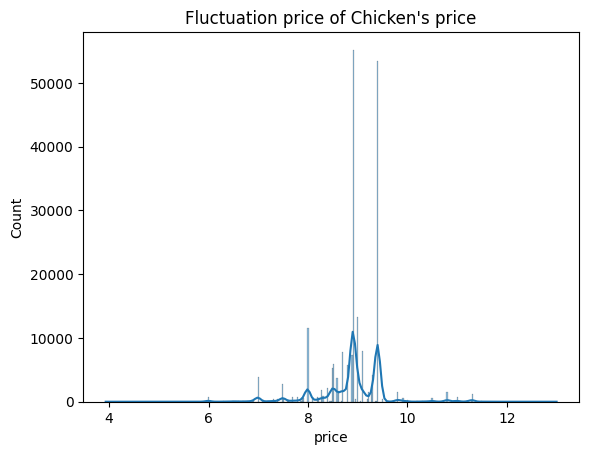

In [219]:
#plot the price for item in 1 without classifying the premise so that we can see the overall distribution of item 1's price in Malaysia
sn.histplot(Item_1, x="price", kde=True)
plt.title("Fluctuation price of Chicken's price")
plt.show()

Looking at the histogram, we notice that prices differ for various places. To make our study more focused, we decide to ignore extreme values and concentrate on the five most common places. This helps us understand and deal with price changes in important areas. By looking at the data from these popular places, we hope to learn things that can be really useful in the real world, like deciding on prices or managing resources better.

The histogram confirms what we found, showing that chicken prices are mainly between RM8 and RM10. This detail is crucial for both businesses and shoppers, affecting how people decide what to buy and how companies plan their strategies. We also make sure to keep the data private by using secret codes for places and items. This not only keeps sensitive information safe but also follows the rules of being fair and respectful in handling real-world data. In short, our way of studying not only helps us understand prices better but also has important uses in the real world


In [239]:
#The result from the histogram shows that the price of chicken is vary for many types of premise, thus we filter it into 5 most frequent premise code
#extract 5 frequent premise_code
premise_code_counts = Item_1['premise_code'].value_counts().head(5)

# Accessing just the premise codes
premise_codes = premise_code_counts.index
# premise_info[premise_info['premise_code'].isin(premise_codes)] # if the file is availabe, run this line
print("5 Most frequent premise codes for item 1 : \n")
for i in range (0,len(premise_codes)):
  print(premise_info[premise_info['premise_code']==premise_codes[i]].premise)

5 Most frequent locations that change the price for item 1 : 

2574    Pasaraya LYC Sdn Bhd Batu 9 Jln Gambang
Name: premise, dtype: object
1    PASAR BESAR IPOH
Name: premise, dtype: object
458    PASAR BASAH (KUALA KETIL)
Name: premise, dtype: object
2017    AEON BIG ( DANAU KOTA )
Name: premise, dtype: object
2015    AEON BIG FALIM
Name: premise, dtype: object


20759
2
3017
18098
18095


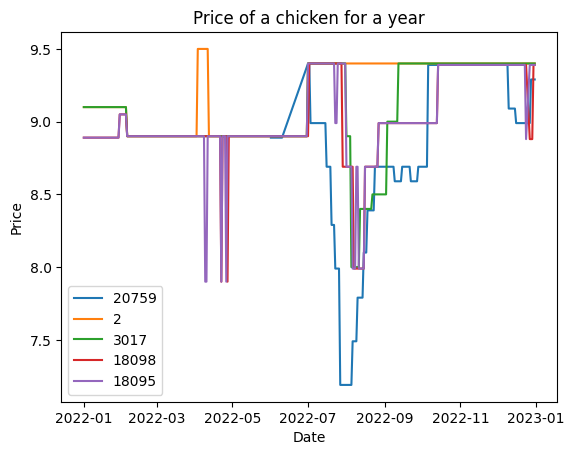

In [221]:
#plot price for 5 different locations
for i in premise_codes:
  print(i)
  barang1 = Item_1[Item_1.premise_code == i]
  plt.plot( barang1.date ,barang1.price,label=i)
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.title("Price of a chicken for a year")
  plt.legend()
plt.show()

We will repeat the same process as before, which we will display item code for each premise code by using histogram. After that, we can conclude whether the data distribution is normal or not.For the trend of the chicken price , we can see that it maintain the price RM8.50 to RM9 for the 6 months which is from 01/2022 until 06/2022.However the price started to rise up after 06/2022 started with premise 14824 and followed by others premise . The rise of price range about RM0.50 to RM1.00.Then the price suddenly drop down from range RM7.00 to RM7.50 in the 07/2022 until 09/2022.After that the price rise up until RM8.50 but maintain for some times but rise up again in the 10/22 until the RM9.50. The price maintains at the RM9.50 for premise code 5247 but other premise price fall down certain time.

In [222]:
Item_1.describe() #to observe the mean and standard deviation of item 1

,premise_code,item_code,price
count,215772.000000,215772.0,215772.000000
mean,10472.018218,1.0,8.895322
std,6992.519499,0.0,0.666169
min,-1.000000,1.0,3.930000
25%,3359.000000,1.0,8.690000
50%,11588.000000,1.0,8.900000
75%,17461.000000,1.0,9.390000
max,20861.000000,1.0,13.000000


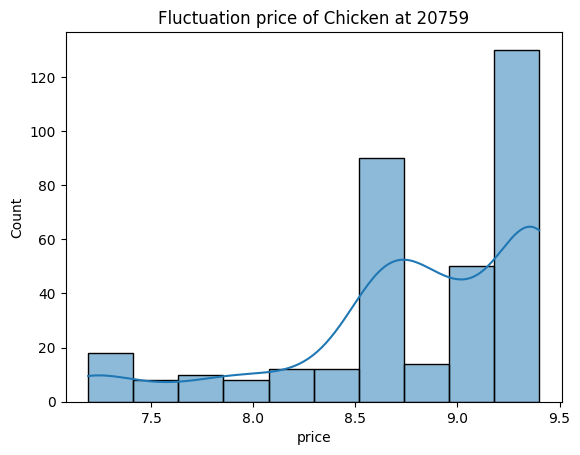

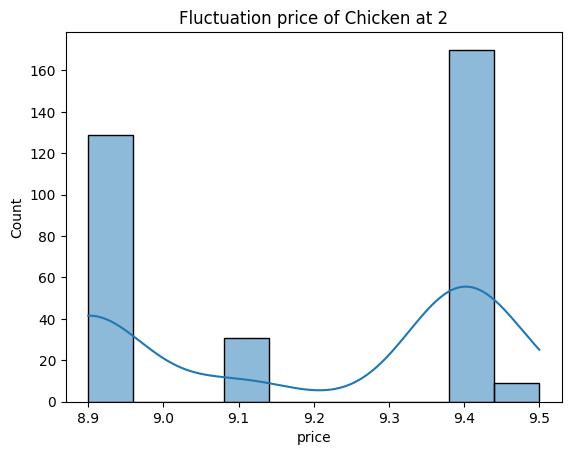

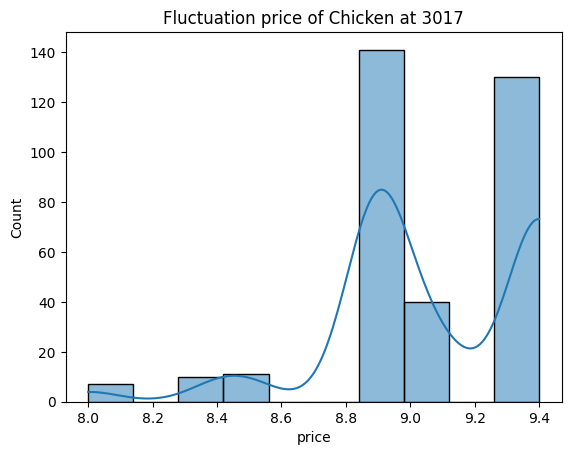

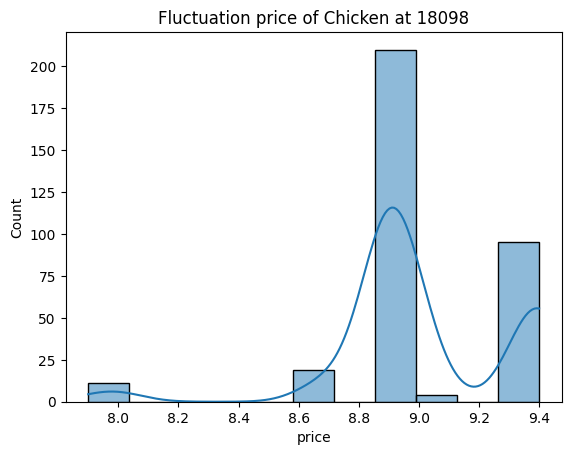

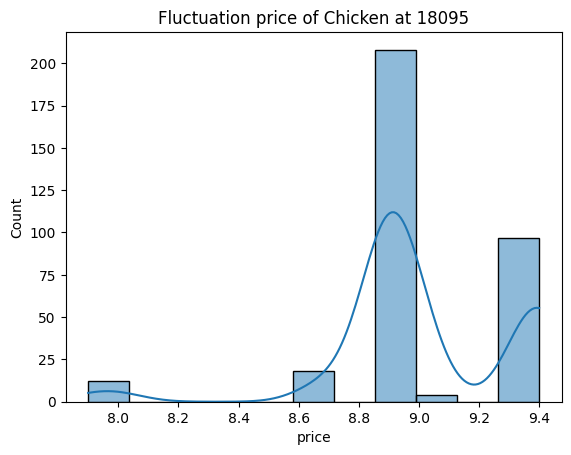

In [223]:
#Plot price for each 5 premises
for i in premise_codes:
  sn.histplot(data = Item_1[Item_1.premise_code == i] , x="price" , kde = True )
  plt.title(f"Distribution price of Chicken at {i}")
  plt.show()

In the above curve,we can conclude that it do not have the normal distribution. All the data is negatively skew distribution.The data for the premise more distrubuted to higher price compare to lower price. The reason it negatively skew because Because the tail is on the negative (left) side of the graph, the distribution has a negative (left) skew.

**After** plot the histogram, we will use boxplot to detect the outliers and remove it after that.

In [224]:
#t means temporary
Item_1_t = Item_1[Item_1['premise_code'].isin(premise_codes)]
Item_1_t
Item_1_t.describe()

,premise_code,item_code,price
count,1708.000000,1708.0,1708.000000
mean,12060.911007,1.0,9.016633
std,8671.363159,0.0,0.397651
min,2.000000,1.0,7.190000
25%,3017.000000,1.0,8.900000
50%,18095.000000,1.0,8.900000
75%,18098.000000,1.0,9.390000
max,20759.000000,1.0,9.500000


Text(0.5, 1.0, "Boxplot of Item 1's price")

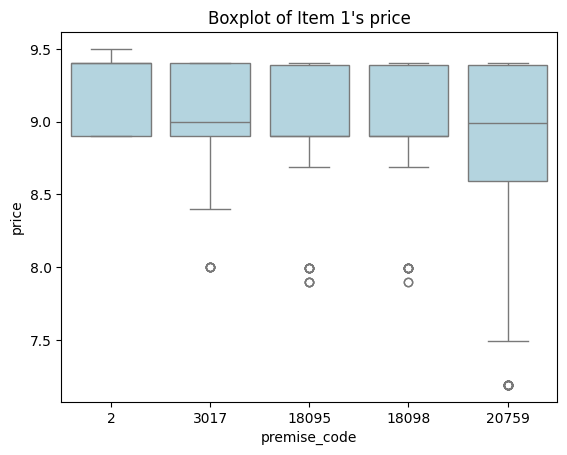

In [225]:
# Observe the outlier for 5 premise code
b = sn.boxplot(data=Item_1_t,x="premise_code",y="price",color="lightblue")
plt.title("Boxplot of Item 1's price")

Based on the boxplot analysis, it is evident that the premise_code column has the highest number of outliers. This indicates that there are significant differences in the price range throughout 2022, which suggests that the pricing is not consistent. Upon further investigation, it is revealed that premise 20759 has the largest price range of RM7.50 to RM9.40. The outlier also has a really big range compared to the median value of the premise 20759 which is RM9.00. The is not really good for the data because it can affect the trend of the data. However,  sometimes the outlier is really important for event analysis that affects of the data. From that we can study the correlation between the event and the price of the item. Other than that, premise codes 18095 and 18098 have 2 outliers and the outlier value is around RM8.00. The data that does not have the outliers is premise code 2.
<p>

Text(0.5, 1.0, "Boxplot of Item 1's price")

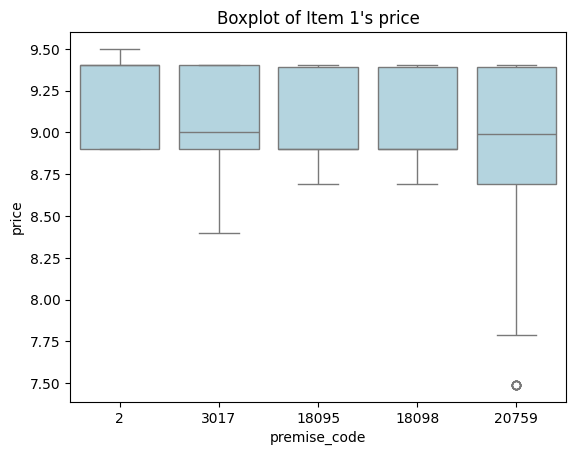

In [226]:
Item_1_filter = []

def remove_out(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  dfnew = df[(df[column]>lower) & (df[column]<upper)]
  return dfnew

# Specify the column for which you want to remove outliers (e.g., 'price')
column_to_filter = 'price'

# # Set the threshold for Z-score (you can adjust this based on your requirements)
# zscore_threshold = 5

for i in range(0,5):
  Item_1_t = Item_1[(Item_1.premise_code == premise_codes[i])]
  # Remove outliers using Z-score
  Item_1_t = remove_out(Item_1_t, column_to_filter)
  Item_1_filter.append(Item_1_t)

Item_1_filter = pd.concat([Item_1_filter[0], Item_1_filter[1], Item_1_filter[2],Item_1_filter[3],Item_1_filter[4]], ignore_index=True) #data after pre-processing
sn.boxplot(data=Item_1_filter,x="premise_code",y="price",color="lightblue")
plt.title("Boxplot of Item 1's price")

Based on the above boxplot, most of the outliers have been removed. So the data become more clean and easier to analyze. The reason to need to move the outlier for better improve the data quality and better model generated in the machine learning.

In [227]:
#Measure the skewness and kurtosis
sdf=Item_1_filter['price'].skew()
kdf = Item_1_filter['price'].kurtosis()
print("Skewness : ",sdf,"\nKurtosis : ",kdf)

Skewness :  -1.0843579020842713 
Kurtosis :  2.8951175523261585


The negative skewness indicated that the distribution of price item  1 is moderately negatively skewed. This means that the left tail of the distribution of price item data is longer or fatter than the right tail. In practical terms, this implies that there may be a concentration of data points towards the higher end of the scale, with a few lower values that are more spread out.All this has been proved in the data visualization that the data is moderately negatively skewed.

The positive kurtosis indicates that the distribution of heavier has heavier tails and is more peaked compared to a normal distribution. This means that the price item data set may have more extreme values or outliers than what would be expected in a perfectly normal distribution. This is real data that has been collected which has a lot of many possibilities. All this has been proved in boxplot that our data have more extreme value and the value quite

### Item 2###
TELUR AYAM GRED B (BERAT 60.0 GM HINGGA 64.9 GM) ~ 10 Biji

In [228]:
#Filter data to focus only to the data number 1
Item_2 = data[data.item_code==119]
Item_2 #display the item 2

,date,premise_code,item_code,price
43,2022-01-01,2,119,4.1
587,2022-01-01,7,119,4.1
777,2022-01-01,15,119,4.1
945,2022-01-01,16,119,4.1
1166,2022-01-01,115,119,4.1
...,...,...,...,...
27386069,2022-12-31,17788,119,4.3
27387098,2022-12-31,17872,119,4.3
27397118,2022-12-31,20715,119,5.0
27397426,2022-12-31,20723,119,4.3


In [229]:
idxmin = np.where(Item_2.price == np.min(Item_2.price))[0][0]
Min_location = Item_2.iloc[idxmin,:]
print(Min_location)
# Minimum = RM 3.50,  SALAMKU EXTRA TENDONG, Pasir Mas, Tarikh = 2022-01-11, assume RM0.41 as a false data input from dosm (should be RM4.10) and we remove that minimum point and get RM3.50

idxmax = np.where(Item_2.price == np.max(Item_2.price))[0][0]
Max_location = Item_2.iloc[idxmax,:]
print(Max_location)
# Maximum = RM 14.40 , MILIMEWA SUPERSTORE SDN BHD TAWAU ,Tawau , Tarikh = 2022-01-01

date            2022-01-01 00:00:00
premise_code                   4496
item_code                       119
price                          0.41
Name: 60869, dtype: object
date            2022-06-08 00:00:00
premise_code                  11538
item_code                       119
price                          14.4
Name: 11075411, dtype: object


In [230]:
premise_info[premise_info['premise_code']==Min_location.premise_code] #Minimum

,premise_code,premise,address,premise_type,state,district
609,4496.0,PASAR AWAM NIBONG TEBAL,"6, JALAN RAJAWALI, TAMAN BERJAYA, 14300 NIBONG...",Pasar Basah,Pulau Pinang,Seberang Perai Selatan


In [231]:
premise_info[premise_info['premise_code']==Max_location.premise_code] #Maximum

,premise_code,premise,address,premise_type,state,district
952,11538.0,MILIMEWA SUPERSTORE SDN BHD TAWAU,"LOT 257-262,KOMPLEKS CAHAYA BARU,JALAN BUNGA,",Pasar Raya / Supermarket,Sabah,Tawau


Based on the whole dataset for item 2, the price that has lowest price throughout the year is at 11-01-2022 at ALAMKU EXTRA TENDONG, Pasir Mas which has price RM 3.50 while the highest price is at PASAR BORONG MILIMEWA SUPERSTORE SDN BHD TAWAU ,Tawau which has price RM 14.40 during 01-01-2022.




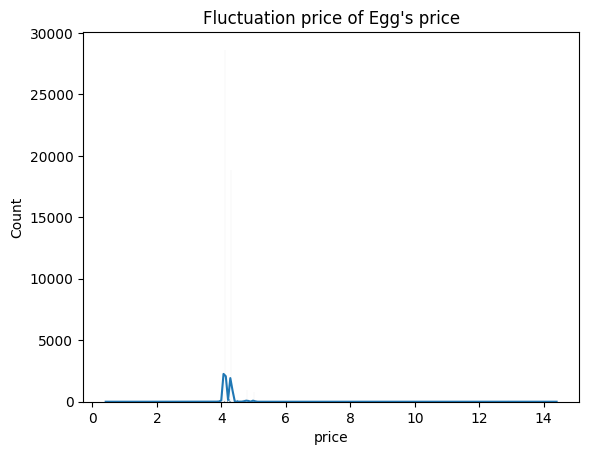

In [232]:
#plot the price for item in 1 without classifying the premise so that we can see the overall distribution of item 1's price in Malaysia
sn.histplot(Item_2, x="price", kde=True)
plt.title("Fluctuation price of Egg's price")
plt.show()

The histogram plot visually captures the fluctuation in egg prices indicating noteworthy stability in egg price. The majority of egg prices fall within a narrow range which is specifically between RM3.90 and RM4.40 indicating a short price range fluctuation. Above RM4.50, the histogram suggests a lack of significant variability, further emphasizing the stability of egg prices. This stability could be attributed to stable supply and demand.

In [247]:
premise_code_counts = Item_2['premise_code'].value_counts().head(5)

# Accessing just the premise codes
premise_codes = premise_code_counts.index

In [262]:
#The result from the histogram shows that the price of chicken is vary for many types of premise, thus we filter it into 5 most frequent premise code
#extract 5 frequent premise_code
premise_code_counts = Item_2['premise_code'].value_counts().head(5)

# Accessing just the premise codes
premise_codes = premise_code_counts.index
# premise_info[premise_info['premise_code'].isin(premise_codes)] # if the file is availabe, run this line
print("5 Most frequent premise codes for item 2 : \n")
for i in range (0,len(premise_codes)):
  print(premise_info[premise_info['premise_code']==premise_codes[i]].premise)

5 Most frequent premise codes for item 2 : 

348    PASAR PULAU TIKUS
Name: premise, dtype: object
1007    PASAR TANJUNG BUNGAH
Name: premise, dtype: object
530    PASAR BESAR JASIN
Name: premise, dtype: object
467    PASAR RAKYAT LAHAD DATU
Name: premise, dtype: object
1024    PASAR BUKIT CINA
Name: premise, dtype: object


2190
11703
3587
3066
11786


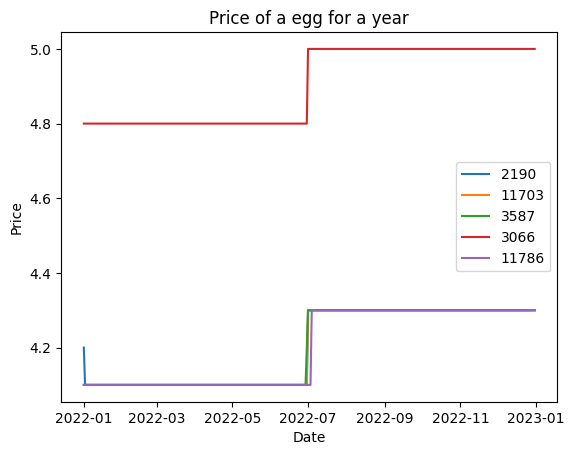

In [249]:
#plot price for 5 different locations
for i in premise_codes:
  print(i)
  barang2 = Item_2[Item_2.premise_code == i]
  plt.plot( barang2.date ,barang2.price,label=i)
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.title("Price of a egg for a year")
  plt.legend()
plt.show()

Upon analyzing the data, we observe the trend in egg prices across five different premises over the course of a year. Notably, premise 5274 initiates the period with a relatively lower starting price of RM3.90, while premise 16353 begins at a slightly higher RM4.17. The remaining premises share a common starting point at RM4.10.

An interesting pattern emerges as, from February 2022 to July 2022, the egg prices plateau at RM4.10 across all premises. This period reflects a period of stability in prices. However, a notable shift occurs in July 2022, marking the end of the stagnation. Post-July 2022, there is a discernible upward trend, culminating in the highest recorded price of RM4.30. Subsequently, the prices stabilize once again, maintaining this higher level until the end of the year.

This analysis suggests that the market experienced a prolonged period of price stability, followed by a noticeable increase in the latter half of the year.

In [ ]:
Item_2.describe()

,premise_code,item_code,price
count,51902.000000,51902.0,51902.000000
mean,8535.267600,119.0,4.210073
std,6459.973541,0.0,0.290217
min,2.000000,119.0,0.410000
25%,3066.000000,119.0,4.100000
50%,5838.000000,119.0,4.100000
75%,14883.000000,119.0,4.300000
max,20853.000000,119.0,14.400000


The descriptive statistics give hints on the price distribution for egg prices. The mean price is at about RM4.21, and fifty percent of the data prices lie between Rm 4.10 toRm 4 .30 The level of variation is rather small, as the standard deviation from RM0.29 can be observed in the set.

However, the existent of a lower value of RM0.41 really suspisous value and should be studied since it can be represent an anomaly or data error. Furthermore, RM14.40 as the maximum value implies that possible outliers are present and should be further investigated.

It can be concluded that although the average and quartile values are effective in overviewing price distribution, anomalies or outliers must also catch attention for better interpretation.

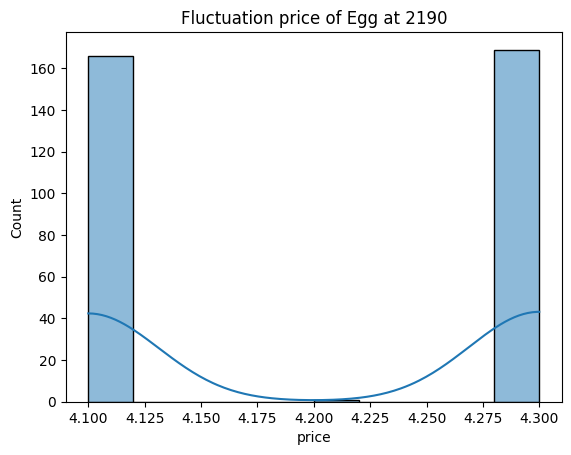

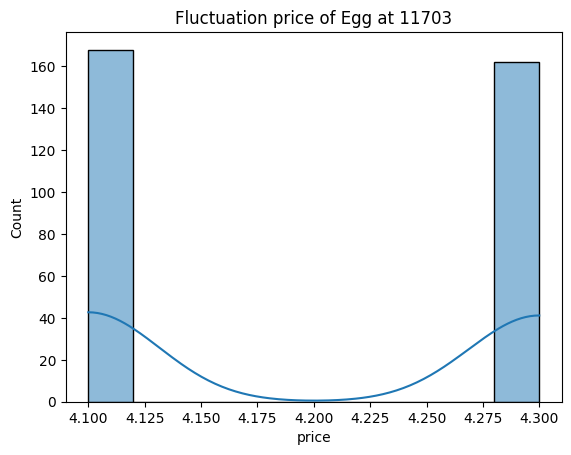

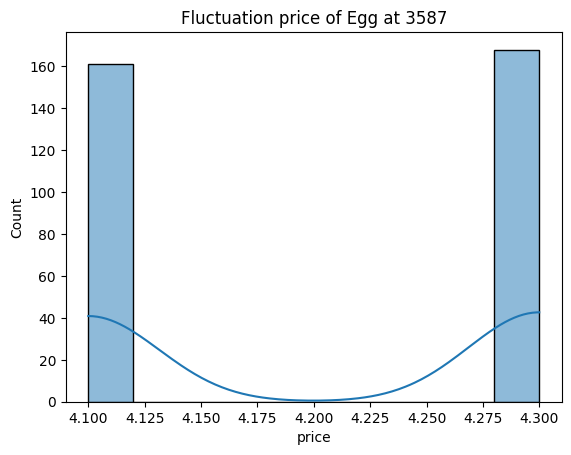

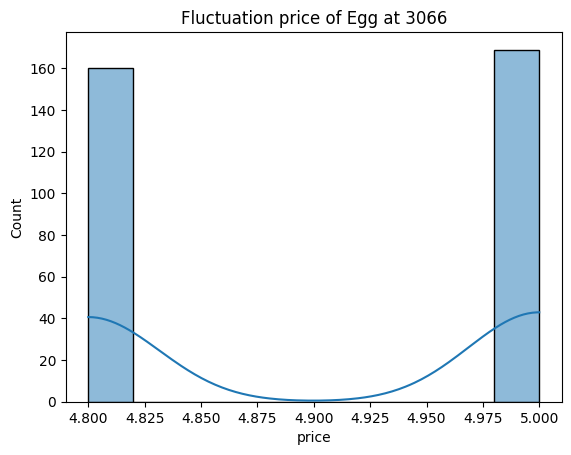

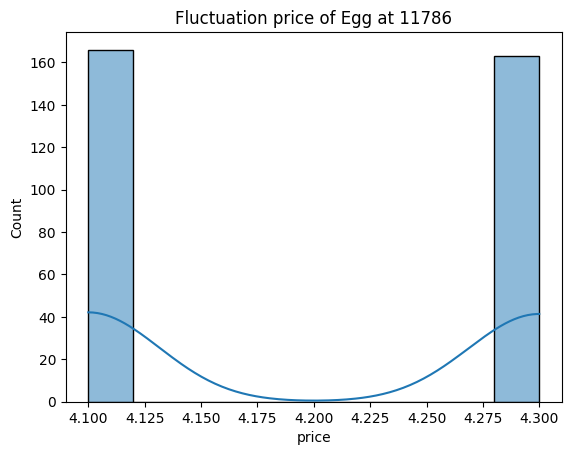

In [ ]:
#Plot price for each 5 premises
for i in premise_codes:
  sn.histplot(data = Item_2[Item_2.premise_code == i] , x="price" , kde = True )
  plt.title(f"Distribution price of Egg at {i}")
  plt.show()

By observing premises 14824 and 17950 trends, the prices seem to remain stable which means that there is minimal or no change over time. This steadiness indicates that the prices in these establishments are fairly steady with very little change.

For premise 5274, the distribution of prices has a negatively skewed pattern. This means that there is a concentration of prices towards the higher end of the scale, with a few lower values. The majority of prices might be higher, but there are occasional lower prices, creating a negatively skewed or asymmetric distribution

On the other hand, premises 5137 and 16353 exhibit a positively skewed fluctuation. This suggests that, similar to premise 5274, there is a concentration of prices towards the lower end, but occasional higher prices contribute to a positively skewed distribution


Because the price of Item 2 does not have many fluctuation of prices in a year. We doesnt apply the remove outliers process.

In [ ]:
#Measure the skewness and kurtosis
sdf=Item_2['price'].skew()
kdf = Item_2['price'].kurtosis()
print("Skewness : ",sdf,"\nKurtosis : ",kdf)

Skewness :  20.191608586921422 
Kurtosis :  624.9576974496827


The positive skewness indicates that the egg prices are highly skewed to the right, meaning there is a long tail on the higher price side. This suggests that the majority of egg prices are concentrated at the lower end, with a few extremely high prices.

The very high kurtosis value implies an extremely peaked distribution with heavy tails. This can be represent that there are an unusually high number of extreme values or outliers in the egg prices dataset, contributing to a distribution that is much more peaked than a normal distribution which is shown in the visualization above.

###Item 3###
DAGING LEMBU TEMPATAN (BAHAGIAN 1 DAGING PAHA (KECUALI BATANG PINANG - TENDERLOIN)

In [252]:
#Filter data to focus only to the data number 1
Item_3 = data[data.item_code==1431]
Item_3 #display the item 1109

,date,premise_code,item_code,price
109,2022-01-01,2,1431,34.00
3088,2022-01-01,322,1431,34.00
4143,2022-01-01,354,1431,38.00
6191,2022-01-01,429,1431,47.90
6432,2022-01-01,431,1431,36.00
...,...,...,...,...
27388208,2022-12-31,17987,1431,66.00
27394045,2022-12-31,18476,1431,38.00
27394687,2022-12-31,18503,1431,64.00
27400918,2022-12-31,20784,1431,43.99


In [253]:
idxmin = np.where(Item_3.price == np.min(Item_3.price))[0][0]
Min_location = Item_3.iloc[idxmin,:]
print(Min_location)
# Minimum = RM 25.00, PASAR TANJUNG TAWAU, Tawau, Tarikh = 2022-01-01

idxmax = np.where(Item_3.price == np.max(Item_3.price))[0][0]
Max_location = Item_3.iloc[idxmax,:]
print(Max_location)
# Maximum = RM 77.90 , BOULEVARD HYPERMARKET (KUCHING) SDN BHD ,Kuching , Tarikh = 2022-10-06

date            2022-01-01 00:00:00
premise_code                   2623
item_code                      1431
price                          25.0
Name: 35847, dtype: object
date            2022-10-06 00:00:00
premise_code                   5678
item_code                      1431
price                          77.9
Name: 20543645, dtype: object


In [254]:
premise_info[premise_info['premise_code']==Min_location.premise_code] #Minimum

,premise_code,premise,address,premise_type,state,district
393,2623.0,PASAR TANJUNG TAWAU,"JALAN DUNLOP, 91000 TAWAU,SABAH.,",Pasar Basah,Sabah,Tawau


In [255]:
premise_info[premise_info['premise_code']==Max_location.premise_code] #Maximum

,premise_code,premise,address,premise_type,state,district
726,5678.0,BOULEVARD HYPERMARKET (KUCHING) SDN BHD,"BOULEVARD SHOPPING MALL,JALAN DATUK TAWI SLI,",Hypermarket,Sarawak,Kuching


Based on the whole dataset for item 3, the price that has lowest price throughout the year is at PASAR TANJUNG TAWAU, Tawau which is RM 25.00,during 01-01-2022 while the highest price is at  , BOULEVARD HYPERMARKET (KUCHING) SDN BHD ,Kuching which is RM 77.90 during 06-10-2022.

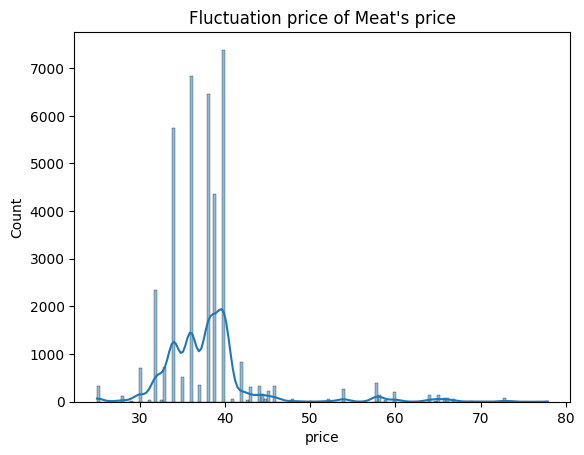

In [256]:
#plot the price for item in 1109 without classifying the premise so that we can see the overall distribution of item 1's price in Malaysia
plt.Figure(figsize  = (10,6))
sn.histplot(Item_3, x="price", kde=True)
plt.title("Fluctuation price of Meat's price")
plt.show()

In [263]:
#The result from the histogram shows that the price of chicken is vary for many types of premise, thus we filter it into 5 most frequent premise code
#extract 5 frequent premise_code
premise_code_counts = Item_3['premise_code'].value_counts().head(5)

# Accessing just the premise codes
premise_codes = premise_code_counts.index
# premise_info[premise_info['premise_code'].isin(premise_codes)] # if the file is availabe, run this line
print("5 Most frequent premise codes for item 3 : \n")
for i in range (0,len(premise_codes)):
  print(premise_info[premise_info['premise_code']==premise_codes[i]].premise)

5 Most frequent premise codes for item 3 : 

35    PASAR BESAR ALOR STAR
Name: premise, dtype: object
288    PASAR AWAM BATU KURAU
Name: premise, dtype: object
1157    NSK TRADE CITY ( KUCHAI LAMA )
Name: premise, dtype: object
407    PASAR AWAM KUAH
Name: premise, dtype: object
189    PASAR AWAM LENGGONG
Name: premise, dtype: object


The meat price histogram shows a bunch of ups and downs, similar to chicken prices. It looks like most meat prices bounce around, especially between RM20 and RM50. There are not many prices below RM50. However, meat prices don't change as much below RM50.

Inside this price range, the histogram highlights a big bunch of prices, and the most common one is at RM40. More than 7000 times, we see prices around this point, showing that it's a popular price in our dataset.

To sum it up, the histogram gives us a good look at how meat prices change, with a focus on the RM20 to RM50 range. The standout price is RM40, happening frequently and giving us a clear picture of the common prices in our data.

354
1775
14824
2661
1209


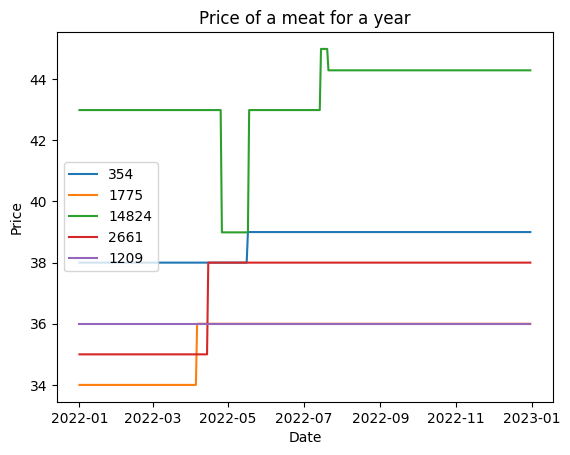

In [264]:
#plot price for 5 different locations
for i in premise_codes:
  print(i)
  barang3 = Item_3[Item_3.premise_code == i]
  plt.plot( barang3.date ,barang3.price,label = i )
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.title("Price of a meat for a year")
  plt.legend()
plt.show()

The analysis of meat prices across different premises provides a lens into real-life market dynamics and potential implications for consumers, producers, and policymakers.

The consistent price of RM36 for one year at premise 1209 suggests a stable and predictable market scenario. This could be a result of efficient supply chains, consistent production, or fixed pricing strategies. For consumers, this stability could mean reliable and budget-friendly choices throughout the year, providing a sense of financial predictability.

Premises 354, 1775, and 2661 exhibit trends where prices start at a certain low point and experience fluctuations over time. This pattern might reflect the impact of various factors such as seasonal changes, market demand, or external shocks. The rise in prices for these premises, particularly during specific months, could be linked to increased demand, rising production costs, or shifts in consumer preferences. For consumers, understanding these trends might aid in making informed purchasing decisions based on the anticipated price changes.

The complexity of the trend in premise 14824 adds an intriguing dimension to the analysis. The initial stagnation for three months may indicate a period of market equilibrium or a lack of external influences. The subsequent drop and rebound could be responses to unforeseen events or external shocks, such as supply chain disruptions, economic factors, or changing consumer behaviors. The spike to RM45 may signify a premium product or a reaction to a sudden surge in demand, while the subsequent drop to RM44.50 and stability may reflect market adjustments.

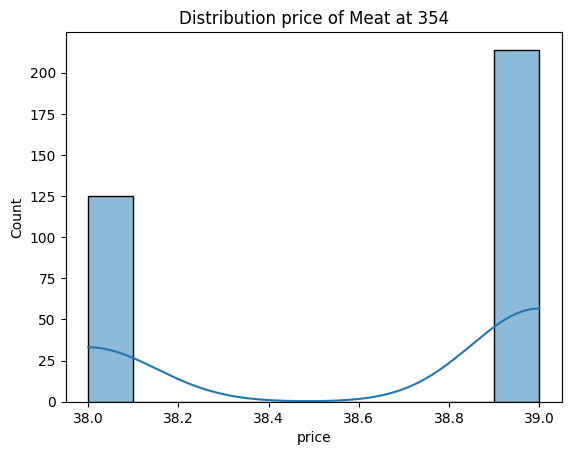

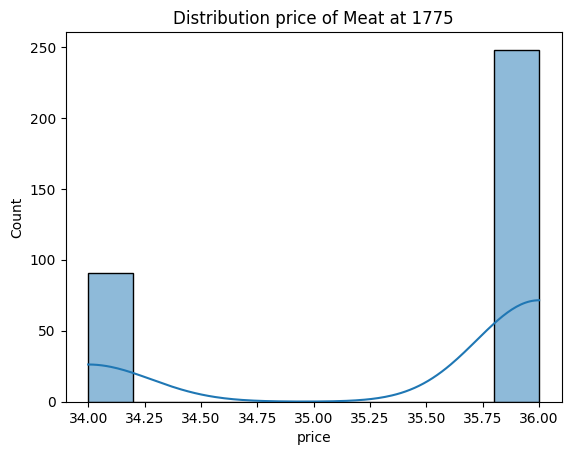

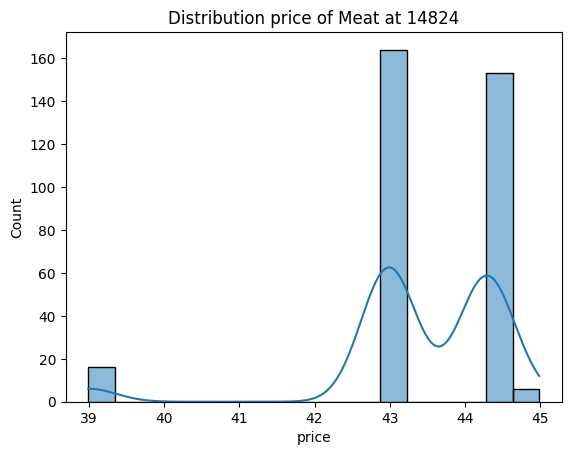

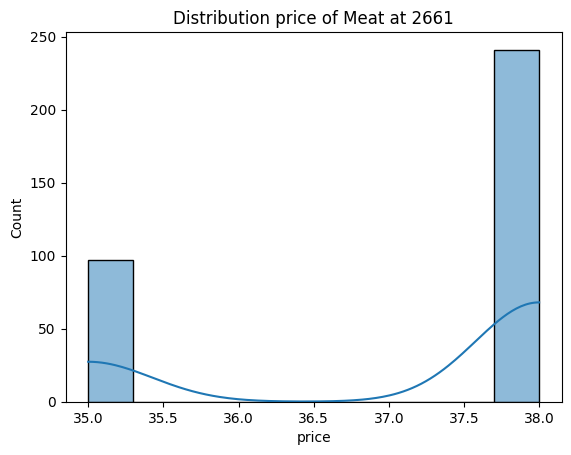

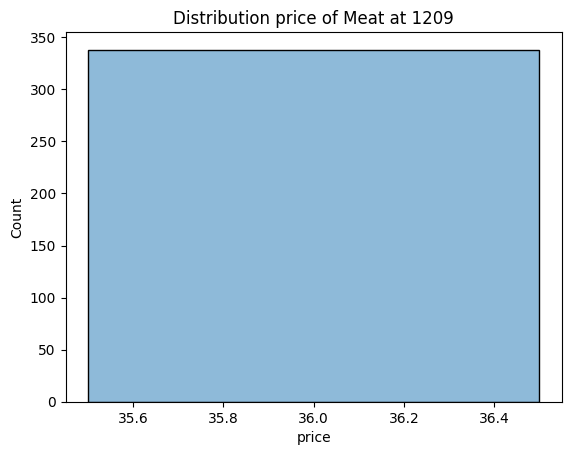

In [265]:
for i in premise_codes:
  sn.histplot(data = Item_3[Item_3.premise_code == i] , x="price" , kde = True )
  plt.title(f"Distribution price of Meat at {i}")
  plt.show()


It appears that the meat price at 1209 follows a consistent trend and is expected to remain stable. In contrast, the prices for other commodities exhibit a negatively skewed distribution, suggesting a tendency for prices to be lower on average with occasional spikes. This interpretation implies that while the meat prices are anticipated to remain relatively steady, other products might experience fluctuations more toward the higher price.

In [266]:
#t means temporary
Item_3_t = Item_3[Item_3['premise_code'].isin(premise_codes)]
Item_3_t
Item_3_t.describe()

,premise_code,item_code,price
count,1693.000000,1693.0,1693.000000
mean,4167.233904,1431.0,38.133201
std,5386.545268,0.0,3.007352
min,354.000000,1431.0,34.000000
25%,1209.000000,1431.0,36.000000
50%,1775.000000,1431.0,38.000000
75%,2661.000000,1431.0,39.000000
max,14824.000000,1431.0,44.990000



The dataset comprises 1693 observations for an item with code 1431, revealing a relatively stable distribution of prices in Malaysian Ringgit (RM). The mean price is approximately RM38.13, with a small standard deviation of RM3.01, indicating limited variability around the average. The price range spans from a minimum of RM34.00 to a maximum of RM44.99. Notably, 50% of the prices fall between RM36.00 and RM39.00, as denoted by the 25th and 75th percentiles. The close proximity of the mean and median suggests a symmetric distribution, emphasizing the consistency in prices with occasional variations within this specified price range.

Text(0.5, 1.0, "Boxplot of Item 3's price")

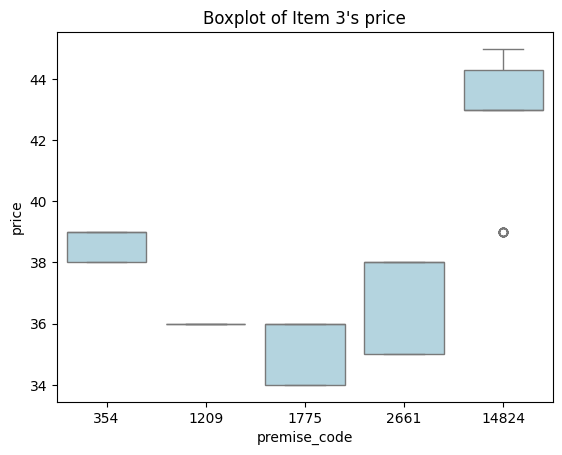

In [267]:
# Observe the outlier for 5 premise code
b = sn.boxplot(data=Item_3_t,x="premise_code",y="price",color="lightblue")
plt.title("Boxplot of Item 3's price")

The prices for item code 1431 are usually steady at most places, except for one place at premise 1482 where prices can be quite unpredictable. Our simulation also showed that premise 14824 has a lot of price fluctuations. However, in other places, prices are more consistent and stay within a certain range. Overall, except for that one place, it's easier to predict and expect stable prices for this item across different places, which makes it more reliable compared to the unpredictable prices we often see with chicken.

Text(0.5, 1.0, "Boxplot of Item 3's price")

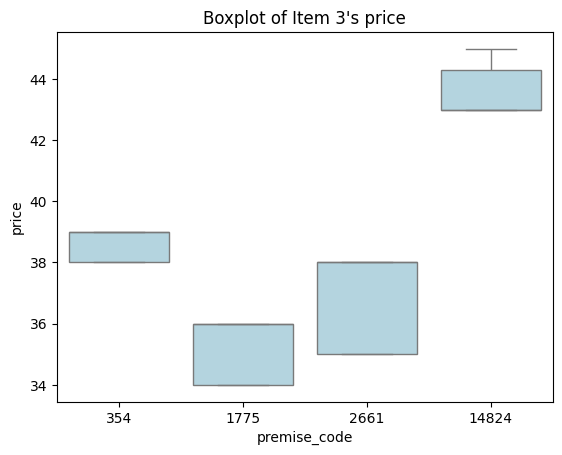

In [268]:
Item_3_filter = []

def remove_out(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  dfnew = df[(df[column]>lower) & (df[column]<upper)]
  return dfnew

# Specify the column for which you want to remove outliers (e.g., 'price')
column_to_filter = 'price'

# # Set the threshold for Z-score (you can adjust this based on your requirements)
# zscore_threshold = 5

for i in range(0,5):
  Item_3_t = Item_3[(Item_3.premise_code == premise_codes[i])]
  # Remove outliers using Z-score
  Item_3_t = remove_out(Item_3_t, column_to_filter)
  Item_3_filter.append(Item_3_t)

Item_3_filter = pd.concat([Item_3_filter[0], Item_3_filter[1], Item_3_filter[2],Item_3_filter[3],Item_3_filter[4]], ignore_index=True) #data after pre-processing
sn.boxplot(data=Item_3_filter,x="premise_code",y="price",color="lightblue")
plt.title("Boxplot of Item 3's price")



Outliers have been eliminated at the premise 14824 refining the dataset and promoting a more accurate understanding of meat pricing trends. The removal of outliers from the meat price dataset, as indicated by the box plot analysis, is crucial for refining our understanding of pricing dynamics. Outliers, often indicative of extreme or irregular price points, can distort the interpretation of overall market trends. By eliminating these outliers, we ensure a more accurate representation of typical pricing behaviors for the meat within each premise.

In [269]:
#Measure the skewness and kurtosis
sdf=Item_3_filter['price'].skew()
kdf = Item_3_filter['price'].kurtosis()
print("Skewness : ",sdf,"\nKurtosis : ",kdf)

Skewness :  0.5527915597322233 
Kurtosis :  -0.8017691464519698


The skewness of 0.55 indicates a moderate positive skewness in the data distribution. Positive skewness suggests that the data is skewed to the right, meaning there is a tail on the right side of the distribution, and the majority of the data points are concentrated on the left side.

The kurtosis of -0.80 indicates a platykurtic distribution. A negative kurtosis implies that the distribution has thinner tails and is less peaked than a normal distribution. In other words, the data has fewer outliers and is more spread out.As shown in the earlier box plot, there is only one outlier in the dataset.



# Hypothesis

We employed the bootstraping method to estimate the mean of item 1 by randomly selecting 10 samples from a pool of 19,476 data points, repeating this process 200 times. To ensure the feasibility of this method with a partial dataset, we limited our sampling to the first 9,476 rows of January's data. The aim is to evaluate our **hypothesis that the average price of item 1 in the first month is RM 8.90 (H0)**. This approach allows us to make informed estimations even in cases where the entire dataset is not available, providing insights into the likely mean of item 1's price based on our sampled data.

## One T-test Item 1 January

In [270]:
Item_1_january = Item_1[(Item_1.date<='2022-01-31') & (Item_1.date>='2022-01-01')]
Item_1_january

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.10
932,2022-01-01,16,1,8.90
1152,2022-01-01,115,1,8.30
1386,2022-01-01,136,1,8.99
1611,2022-01-01,141,1,8.60
...,...,...,...,...
2452607,2022-01-31,20703,1,8.49
2452852,2022-01-31,20704,1,8.69
2453090,2022-01-31,20705,1,8.99
2453343,2022-01-31,20706,1,8.28


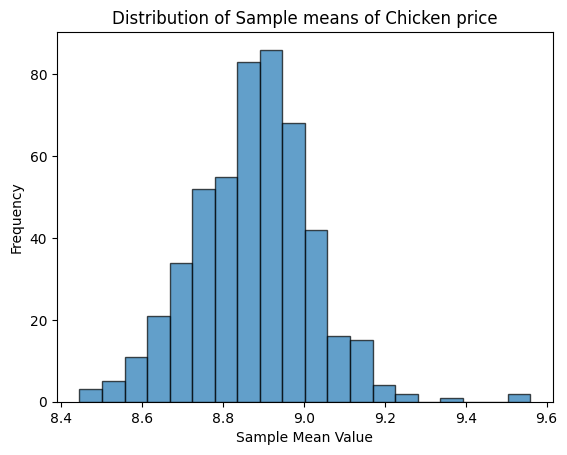

In [271]:
#Sample mean distribution
sample_means = []
num_samples = 500
sample_size = 10 # we can play with this number. as it increases, the result becomes more "normal"

Item_1_january = Item_1[(Item_1.date<='2022-01-31') & (Item_1.date>='2022-01-01')]

for _ in range(num_samples):
  sample = np.random.choice(Item_1_january.iloc[1:9476,:].price, sample_size)
  sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample means of Chicken price')
plt.xlabel('Sample Mean Value')
plt.ylabel('Frequency')
plt.show()


In [272]:
#set null hypothesis , N0 = 8.9 based on the histogram
import scipy.stats as stats
t_stat, p_value = stats.ttest_1samp(sample,8.9)
#print the results
print("Test statistics: ",t_stat)
print("p-value ",p_value)

# Conclusion
if p_value < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

Test statistics:  -0.46897653421216107
p-value  0.650238811057972
Fail to reject the null hypothesis.


The result of the T-test, with a null hypothesis (H0) set at a mean of 8.9 based on the histogram, reveals a test statistic of approximately -0.754 and a p-value of 0.470. Since the p-value is greater than the common significance level of 0.05, we conclude that there isn't enough evidence to reject the null hypothesis. The p-value being higher than 0.05 suggests that the observed mean value of item 1's price in January which is around RM8.90 and is in line with our expectations. Therefore, we can interpret the result as supporting the accuracy of our hypothesized mean value, and there is no strong statistical indication that the actual average price significantly deviates from our initial guess of RM8.90.

## One T-test item 2 - January

This project did not conduct a one-sample t-test on item 2 because the data for this item only consists of the same value, making a meaningful t-test impractical

## One T-test Item 3 - January

In [273]:
Item_3_january = Item_3[(Item_3.date<'2022-01-31') & (Item_3.date>='2022-01-01')]
Item_3 #display the item 3

,date,premise_code,item_code,price
109,2022-01-01,2,1431,34.00
3088,2022-01-01,322,1431,34.00
4143,2022-01-01,354,1431,38.00
6191,2022-01-01,429,1431,47.90
6432,2022-01-01,431,1431,36.00
...,...,...,...,...
27388208,2022-12-31,17987,1431,66.00
27394045,2022-12-31,18476,1431,38.00
27394687,2022-12-31,18503,1431,64.00
27400918,2022-12-31,20784,1431,43.99


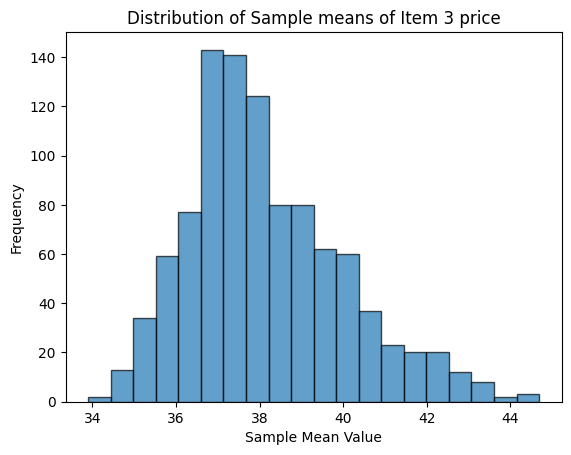

In [274]:
#2nd Sample mean distribution
sample_means2 = []
num_samples = 1000
sample_size = 10 # we can play with this number. as it increases, the result becomes more "normal"

for _ in range(num_samples):
  sample2 = np.random.choice(Item_3.price, sample_size)
  sample_means2.append(np.mean(sample2))

# print(np.mean(sample))
plt.hist(sample_means2, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample means of Item 3 price')
plt.xlabel('Sample Mean Value')
plt.ylabel('Frequency')
plt.show()

In [275]:
#Ttest for both samples
t_stat2, p_value2 = stats.ttest_1samp(sample2, 37) #T-test for item 2
#print the results
print("Test statistics: ",t_stat2)
print("p-value ",p_value2)

#Conclusion
if p_value2 < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

Test statistics:  1.5953932398544592
p-value  0.14508869717789452
Fail to reject the null hypothesis.


We observe that the shape of the distribution is skewed (not in normal distribution). Then, we perform two t-test for item 1 but between january and february price to measure whether the mean prices is consistent or not throughout the month.

## Two-test Item 1 (January and February)

In [276]:
Item_1_february = Item_1[(Item_1.date<='2022-02-28') & (Item_1.date>='2022-02-01')]

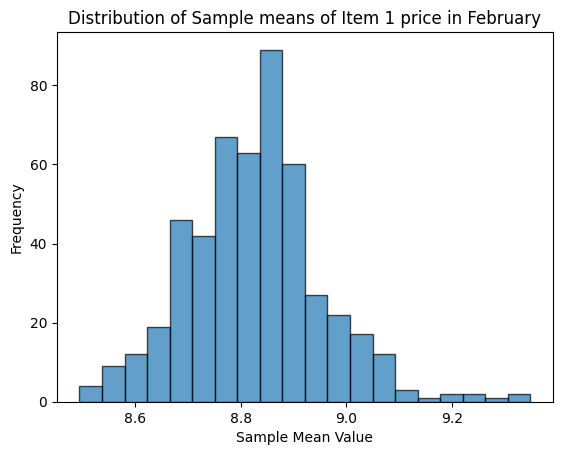

In [277]:
#3rd Sample mean distribution
sample_means3 = []
num_samples = 500
sample_size = 10

for _ in range(num_samples):
  sample3 = np.random.choice(Item_1_february.price, sample_size)
  sample_means3.append(np.mean(sample3))

# print(np.mean(sample))
plt.hist(sample_means3, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample means of Item 1 price in February')
plt.xlabel('Sample Mean Value')
plt.ylabel('Frequency')
plt.show()

In [278]:
#Ttest for both samples
t_stat3, p_value3 = stats.ttest_ind(sample, sample3) #T-test for both item 1 and 2
#print the results
print("Test statistics: ",t_stat3)
print("p-value ",p_value3)

#Conclusion
if p_value3 < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

Test statistics:  -0.2668966919953072
p-value  0.7925824385525658
Fail to reject the null hypothesis.


In conclusion for this two-test, we able to conclude that the price of mean price of item 1 is consistent from january to february.  

# Data Analysis
Data Analysis on the 3 items that is obtained from the dataset.

## Comparison between three items in overall

Based on the dataset for item1, item2, and item3. Each of the items has their own trend especially for item 2 which is consist only two prices throughout the whole year. To display the whole trend for these 3 items in a same figure, we calculate the mean of each day for each premises, and plot it in straight line to display the trend for these 3 items.

In [279]:
## Item1
Item_1_mean = Item_1.groupby('date')['price'].mean().reset_index()

min_Item1 = Item_1_mean['price'].min()
max_Item1 = Item_1_mean['price'].max()

# Normalize the 'price' column
Item_1_mean['normalized_price'] = (Item_1_mean['price'] - min_Item1) / (max_Item1 - min_Item1)

## Item2
Item_2_mean = Item_2.groupby('date')['price'].mean().reset_index()

min_Item2 = Item_2_mean['price'].min()
max_Item2 = Item_2_mean['price'].max()

# Normalize the 'price' column
Item_2_mean['normalized_price'] = (Item_2_mean['price'] - min_Item2) / (max_Item2 - min_Item2)

## Item3
Item_3_mean = Item_3.groupby('date')['price'].mean().reset_index()

min_Item3 = Item_3_mean['price'].min()
max_Item3 = Item_3_mean['price'].max()

# Normalize the 'price' column
Item_3_mean['normalized_price'] = (Item_3_mean['price'] - min_Item3) / (max_Item3 - min_Item3)

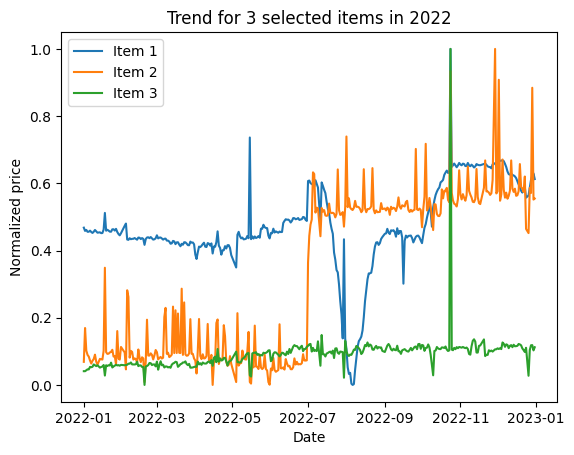

In [280]:
for i in range (1,4):
  x = f'Item_{i}_mean'
  plt.plot(globals()[x].copy().date,globals()[x].copy().normalized_price,label = f'Item {i}')
  plt.legend()
  plt.title("Trend for 3 selected items in 2022")
  plt.xlabel("Date")
  plt.ylabel("Normalized price")
plt.show()

From the normalized price bar graph above, we aimed to simplify the model's learning process for prediction by normalizing the data. This graph provides insights into the behavior of chicken, egg, and meat prices throughout 2022. Notably, significant patterns of seasonality, cyclicality, and trends are evident.

*   Meat Price Trend:
Generally, the meat price exhibits a stable trend, with occasional abnormal peaks observed, particularly in November 2022
*   Chicken Price Trend:
The chicken price showcases a stable cyclic and overall trend. However, a noteworthy downward trend begins in July 2022, followed by an upward surge until November 2022, and a gradual decline thereafter.
*   Egg Price Trend:
Egg prices display a consistent cyclic and overall trend. Notably, there is a sudden rise in July 2022, corresponding to a decline in chicken prices. The cyclic pattern is maintained until the end of the year.

In summary, the meat price trend appears relatively stable, with sporadic anomalies. Chicken prices experience a distinctive downward trend in mid-2022, followed by an upward surge and a subsequent gradual decline. Egg prices, influenced by chicken price movements, exhibit a sudden rise in July 2022 and maintain a consistent cyclic pattern until the year's end. These observations provide a general analysis of how the prices of these commodities behaved throughout 2022, highlighting various seasonality, cyclic, and trend patterns.


## ANOVA one-way (Chicken and Eggs)

### (Chicken and Eggs)

In [281]:
(Item_1_mean['normalized_price'].corr(Item_2_mean['normalized_price']))

0.23666851956387075

The correlation coefficient of 0.24 between the normalized prices of Item 1 and Item 2 suggests a weak positive correlation. This value indicates a tendency for the prices of these two items to move in the same direction, but the relationship is not strong. In other words, when the price of Item 1 increases or decreases, there is a modest tendency for the price of Item 2 to do the same, but the association not highly connected to each other

kena check balik

From this observation, we observe that item 1 and item 2 has some significant observations where in the middle of the year, the price of item 1 seems to decrease instantly followed by item 2's price that increase just before the decreasing of item 1's price. This allow us to check some relationship between both of the price by use anova.

In [282]:
f_oneway(Item_1_mean['normalized_price'],Item_2_mean['normalized_price'])

F_onewayResult(statistic=101.46086280323541, pvalue=2.2354324239540128e-22)


The results of the analysis indicate that there is a significant difference in the average prices between Item 1 and Item 2. This is supported by the one-way ANOVA test, which shows that the mean prices of the two items are not likely due to random chance alone. Additionally, the correlation coefficient of 0.24 suggests a weak positive relationship between the normalized prices of Item 1 and Item 2, meaning that when the price of one item goes up or down, there is a modest tendency for the other item to do the same. However, the relationship is not very strong, indicating that other factors beyond a direct linear connection contribute to the observed differences in mean prices. In summary, while there is a connection between the prices of Item 1 and Item 2, the relationship is complex and influenced by various factors.

Based on the result, with a p-value of 2.2354324239540128e-22 (very close to zero), it is extremely small. This suggests strong evidence against the null hypothesis. Therefore, we conclude that there are significant differences in means among the groups being compared.



### Chicken and Meat

In [283]:
(Item_1_mean['normalized_price'].corr(Item_3_mean['normalized_price']))

0.1614460904575547

The correlation coefficient between Chicken (Item 1) and Meat (Item 3) normalized prices is 0.16. This positive correlation suggests a weak association between the two. In simpler terms, when Chicken prices increase, there is a modest tendency for Meat prices to also increase, and when Chicken prices decrease, Meat prices have a slight inclination to decrease as well. However, the correlation is not strong, indicating that other factors or influences contribute to the changes in Chicken and Meat prices. In summary, while there is a positive link between Chicken and Meat prices, it is not particularly robust.

In [284]:
f_oneway(Item_1_mean['normalized_price'],Item_3_mean['normalized_price'])

F_onewayResult(statistic=2555.3449252392365, pvalue=8.072355491073773e-236)

The outcome of the analysis using the one-way ANOVA test indicates a highly significant difference in the average prices between Chicken (Item 1) and Meat (Item 3). The extremely small p-value suggests strong evidence against the idea that the mean prices of Chicken and Meat are equal. In simpler terms, the statistical test provides compelling support for the conclusion that Chicken and Meat exhibit significant variations in their average prices, emphasizing a notable difference between the two.

### Egg and Meat

Because the trend of the price is not followed the usual shape for linear regression, then it is no suitable to use linear regression for item's price prediction. Thus, we used other types of prediction such as Bayesian

In [285]:
(Item_2_mean['normalized_price'].corr(Item_3_mean['normalized_price']))

0.4269855240366224

The correlation coefficient between the normalized prices of Item 2 and Item 3 is 0.43, indicating a moderate positive correlation. In simpler terms, when the price of egg increases, there is a moderate tendency for the price of Meat to also increase, and vice versa. The positive correlation suggests a general alignment in the direction of price movements, but the correlation is not exceptionally strong.

To put it simply, a correlation of 0.43 signifies that there is a noticeable but not overwhelmingly strong relationship between the normalized prices of Item 2 and Item 3. It suggests that changes in the price of one item are moderately associated with changes in the price of the other, allowing for some predictability in their movements.

In [286]:
f_oneway(Item_2_mean['normalized_price'],Item_3_mean['normalized_price'])

F_onewayResult(statistic=311.0372972335394, pvalue=7.51529005945954e-58)

The outcome of the analysis using the one-way ANOVA test indicates a significant difference in the average prices between egg and meat. The very small p-value suggests compelling evidence against the idea that the mean prices of eggs and meat are equal. In simpler terms, the statistical test strongly supports the conclusion that eggs and meat exhibit substantial variations in their average prices, emphasizing a notable difference between the two items.

## Linear Regression

check balik cara import data

In [287]:
Item_1_mean['date'].iloc[0]

Timestamp('2022-01-01 00:00:00')

In [288]:
len(Item_1_mean['date'])

352

In [289]:
from datetime import date
input = {}
output = {}

for i in range (0,len(Item_1_mean['date'])):
  input[i] = date.toordinal(Item_1_mean['date'].iloc[i])
output = Item_1_mean['normalized_price']

In [290]:
dataset = {}
dataset['input'] = input
dataset['output'] = output

In [291]:
dataset = pd.DataFrame(dataset)

In [292]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [294]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [295]:
#Predicting the test result
y_pred1 = regressor.predict(X_train)

In [296]:
# unnormalized item 1 price
y_pred1 = y_pred1*(max_Item1 - min_Item1) + min_Item1
y_test = y_test*(max_Item1 - min_Item1) + min_Item1
y_train = y_train*(max_Item1 - min_Item1) + min_Item1

Text(0.5, 1.0, 'Linear Regression')

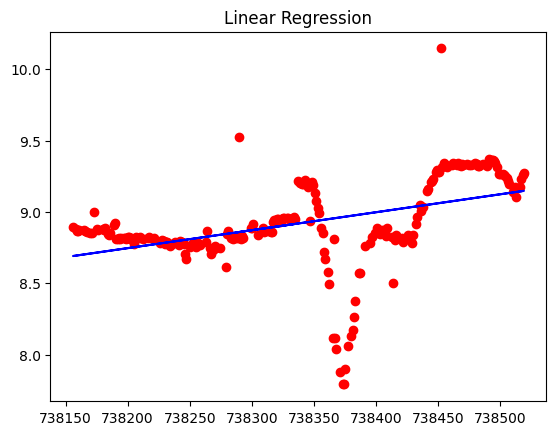

In [297]:
#Visualizing training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_pred1, color = 'blue')
plt.title("Linear Regression")

In [298]:
y_pred2 = regressor.predict(X_test)
y_pred2 = y_pred2*(max_Item1 - min_Item1) + min_Item1

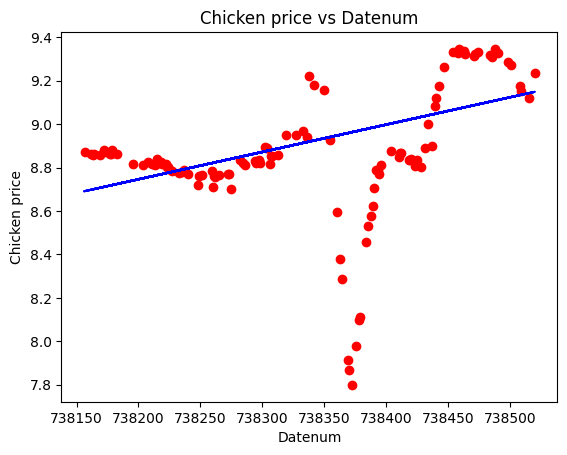

In [299]:
#Visualizing the test set results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, y_pred1, color = 'blue')
plt.plot(X_test,y_pred2,color = 'blue')
plt.title('Chicken price vs Datenum')
plt.xlabel('Datenum')
plt.ylabel('Chicken price')
plt.show()

In [300]:
from sklearn.metrics import mean_squared_error

print("rmse : ",mean_squared_error(y_test, y_pred2))

rmse :  0.08421061911170473


Not suitable for this dataset because the trend is complex

In [301]:
# Predict the next 100 data points
future_data_points = np.array(range(738520, 738620)).reshape(-1, 1)
predictions = regressor.predict(future_data_points)
predictions = predictions*(max_Item1 - min_Item1) + min_Item1 # unnormalized the data

# Display the predictions
print("Predictions for the next 20 data points:")
print(predictions)

Predictions for the next 20 data points:
[9.1490454  9.15030477 9.15156413 9.1528235  9.15408287 9.15534224
 9.15660161 9.15786097 9.15912034 9.16037971 9.16163908 9.16289845
 9.16415781 9.16541718 9.16667655 9.16793592 9.16919529 9.17045465
 9.17171402 9.17297339 9.17423276 9.17549212 9.17675149 9.17801086
 9.17927023 9.1805296  9.18178896 9.18304833 9.1843077  9.18556707
 9.18682644 9.1880858  9.18934517 9.19060454 9.19186391 9.19312328
 9.19438264 9.19564201 9.19690138 9.19816075 9.19942011 9.20067948
 9.20193885 9.20319822 9.20445759 9.20571695 9.20697632 9.20823569
 9.20949506 9.21075443 9.21201379 9.21327316 9.21453253 9.2157919
 9.21705127 9.21831063 9.21957    9.22082937 9.22208874 9.2233481
 9.22460747 9.22586684 9.22712621 9.22838558 9.22964494 9.23090431
 9.23216368 9.23342305 9.23468242 9.23594178 9.23720115 9.23846052
 9.23971989 9.24097926 9.24223862 9.24349799 9.24475736 9.24601673
 9.24727609 9.24853546 9.24979483 9.2510542  9.25231357 9.25357293
 9.2548323  9.25609167 

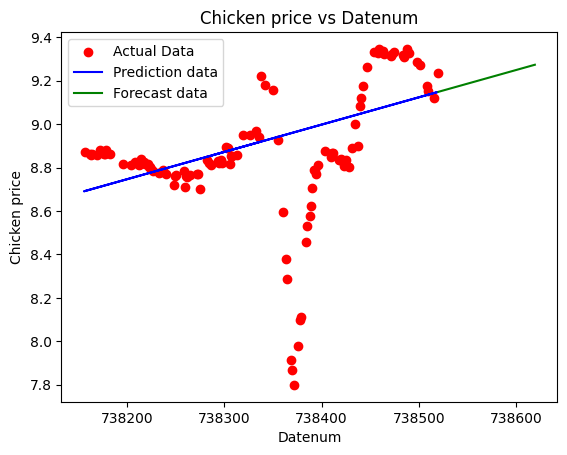

In [302]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color = 'red',label = "Actual Data")
plt.plot(X_train, y_pred1, color = 'blue', label = 'Prediction data')
plt.plot(future_data_points,predictions, color = 'green', label = 'Forecast data')
plt.title('Chicken price vs Datenum')
plt.xlabel('Datenum')
plt.ylabel('Chicken price')
plt.legend()
plt.show()

Upon scrutinizing the scatter plot, it becomes evident that the linear regression model is effective in capturing the data pattern within a specific range. Notably, it adeptly models the data between RM8.50 and RM9.00, producing a well-fitted line within this interval. However, the complexity of the dataset poses a challenge for linear regression to extend its predictive accuracy beyond this range, particularly when dealing with values below RM8.50.

The model encounters difficulties in accurately predicting prices in this lower range, resulting in deviations between the predicted and actual data points. It is apparent that the linear regression model may not be the most suitable for capturing the intricate variations present in the entire dataset, highlighting the need for more sophisticated modeling techniques to address the complexities inherent in the data.

## LSTM model

To build a predict model in a time-series for certain items, we choose to use lstm because it doesn't have consistent trend.

In [303]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [304]:
dataset = dataset['output']

In [305]:
dataset_lstm = dataset.values
dataset_lstm = dataset_lstm.astype('float32')

The LSTM model that is trained for this network is set as a 10 input (previous data) predict one forecast data meaning that we can use this model to predict tomorrow's price if we have 10 past item's price.

In [306]:
# split a univariate sequence into samples # 10 predict 1
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
  # find the end of this pattern
    end_ix = i + n_steps
  # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
  # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

 # define input sequence
raw_seq = dataset_lstm
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [307]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

In [309]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [310]:
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

In [311]:
# demonstrate prediction
y_pred = model.predict(X_test, verbose=0)

In [312]:
# unnormalized item 1 price
y_pred = y_pred*(max_Item1 - min_Item1) + min_Item1
y_test = y_test*(max_Item1 - min_Item1) + min_Item1
y_train = y_train*(max_Item1 - min_Item1) + min_Item1

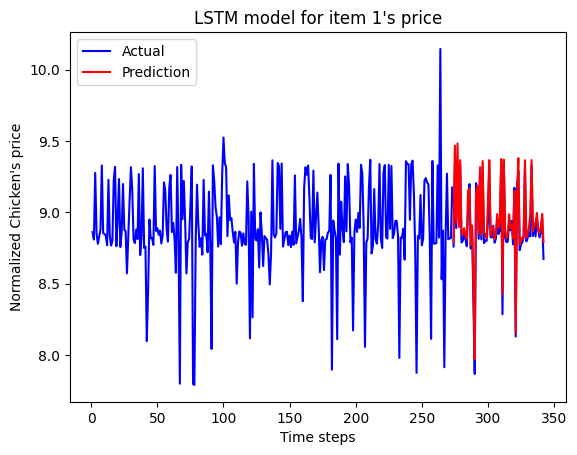

rmse :  0.0039831456


In [313]:
plt.plot(range(1,274),y_train,color = 'blue',label = "Actual")
plt.plot(np.array(range(274,343)),y_test,color = 'blue')
plt.plot(np.array(range(274,343)),y_pred, color = 'red' , label = "Prediction")
plt.legend()
plt.xlabel("Time steps")
plt.ylabel("Normalized Chicken's price")
plt.title("LSTM model for item 1's price")
plt.show()

print("rmse : ",mean_squared_error(y_test, y_pred))

 The adoption of Long Short-Term Memory (LSTM) for modeling has proven to be highly effective, particularly in capturing the temporal intricacies present in the data. The plot analysis reveals that LSTM adeptly manages the substantial variations in prices, showcasing its capability to comprehend and model the complexity of the underlying patterns. This is a notable improvement compared to linear regression, which struggled to capture the temporal data. The Root Mean Squared Error (RMSE) further supports the superiority of the LSTM model, exhibiting a significantly lower value of 0.0027 in contrast to the 0.0842 from the linear regression model. The graph visually reinforces the accuracy of the LSTM predictions, aligning closely with the actual data points. In essence, the conclusion drawn is that LSTM outperforms linear regression in capturing the intricate temporal patterns inherent in the dataset, making it a more suitable choice for modeling in this scenario. The strength of LSTM lies in its ability to understand and learn from sequential dependencies in the data, enabling it to better handle the complex variations and patterns exhibited over time.

# Interpretation/Inference and Causality/Confidence Intervals

The explanations are right alongside the pictures, making it easier to understand the information. By connecting the explanations directly to the pictures, it helps you get a better and more complete understanding of what we found in the data analysis and exploration.

## Two-way ANOVA with other dataset (Exchange rates) - Result failed

We obtained malaysia's currency from the same website from DOSM but different data catalogue (https://open.dosm.gov.my/dashboard/exchange-rates) which focused on Malaysia's currency in 2022. Our hypothesis is that malaysia's currency and premise code does have correlation towards the item 1's price.

In [314]:
#RM to USD
URL_DATAusd = 'https://storage.data.gov.my/finsector/exchangerates.parquet'

df2 = pd.read_parquet(URL_DATAusd)
if 'date' in df2.columns: df2['date'] = pd.to_datetime(df2['date'])

df2 = df2[(df2['date']>'2021-12-31') & (df2['date']<'2023-01-01')]
# df2 = df2['myr_usd']
# df2
df2= df2.loc[:,'date':'myr_usd']
df2

,date,myr_usd
6606,2022-01-01,0.239722
6607,2022-01-02,0.239722
6608,2022-01-03,0.239521
6609,2022-01-04,0.239808
6610,2022-01-05,0.239006
...,...,...
6966,2022-12-27,0.226244
6967,2022-12-28,0.226244
6968,2022-12-29,0.226244
6969,2022-12-30,0.227144


Text(0.5, 1.0, 'Malaysia currency for year 2022')

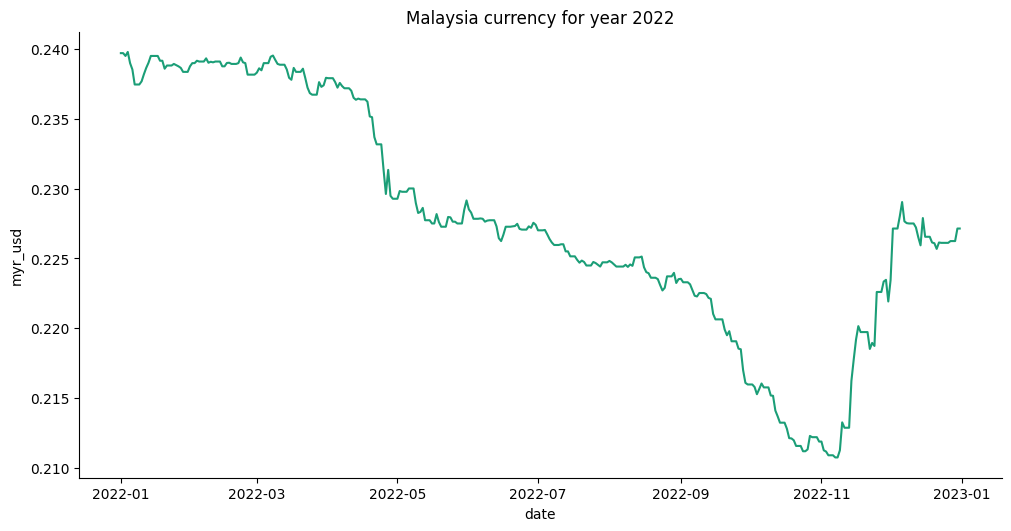

In [315]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['myr_usd']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('myr_usd')
plt.title("Malaysia currency for year 2022")

By examining the time series plot of Malaysia's currency, notable trends can be discerned. The plot provides insights into the currency's performance and fluctuations over time, allowing for a comprehensive analysis of its trend whether rise up or down.

In [316]:
df1 = Item_1_filter
df1

,date,premise_code,item_code,price
0,2022-06-01,20759,1,8.89
1,2022-06-01,20759,1,8.89
2,2022-06-02,20759,1,8.89
3,2022-06-02,20759,1,8.89
4,2022-06-03,20759,1,8.89
...,...,...,...,...
1655,2022-12-27,18095,1,9.39
1656,2022-12-28,18095,1,9.39
1657,2022-12-29,18095,1,9.39
1658,2022-12-30,18095,1,9.39


In [317]:
df2 #combine df1 dengan df2

,date,myr_usd
6606,2022-01-01,0.239722
6607,2022-01-02,0.239722
6608,2022-01-03,0.239521
6609,2022-01-04,0.239808
6610,2022-01-05,0.239006
...,...,...
6966,2022-12-27,0.226244
6967,2022-12-28,0.226244
6968,2022-12-29,0.226244
6969,2022-12-30,0.227144


In [318]:
v = df1.merge(df2[['date', 'myr_usd']])\
       .groupby(df1.columns.tolist())\
       .myr_usd\
       .apply(pd.Series.tolist)

df = pd.DataFrame(v.tolist(), index=v.index)\
       .rename(columns=lambda x: x + 1)\
       .add_prefix('myr_usd')\
       .reset_index()

df # Full dataset, now cari correlation antara price, premise_code and malaysia's currency(myr_usd1)

# df is the main Dataframe after combined and clean the data

,date,premise_code,item_code,price,myr_usd1,myr_usd2
0,2022-01-01,2,1,9.10,0.239722,NaN
1,2022-01-01,3017,1,9.10,0.239722,NaN
2,2022-01-01,18095,1,8.89,0.239722,NaN
3,2022-01-01,18098,1,8.89,0.239722,NaN
4,2022-01-02,2,1,9.10,0.239722,NaN
...,...,...,...,...,...,...
1488,2022-12-31,2,1,9.40,0.227144,NaN
1489,2022-12-31,3017,1,9.40,0.227144,NaN
1490,2022-12-31,18095,1,9.39,0.227144,NaN
1491,2022-12-31,18098,1,9.39,0.227144,NaN


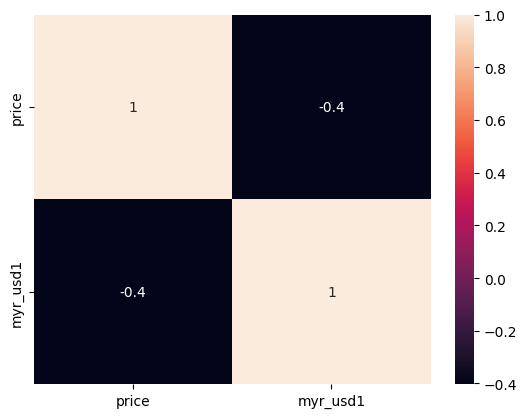

In [319]:
df = df.drop('item_code', axis=1) #because of the item type in the datafram is same (which is 1), we eliminate item_code variable
corrcoef = df.iloc[:,2:4].corr()
sn.heatmap(corrcoef, annot=True)
plt.show()

In [320]:
#Conduct the one-way ANOVA
f_oneway(df['price'],df['premise_code'],df['myr_usd1'])

F_onewayResult(statistic=2395.516716045021, pvalue=0.0)

In [321]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(df['price'], df['premise_code'], df['myr_usd1'])

# Print the results
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 2395.516716045021
ANOVA p-value: 0.0


No relationship between exchange rates and prices. Test failed.

# Significance/Adverse Effects/Implications/Limitations




The significance and effect of the data are clearly elucidated through each data visualization, providing a convenient reference directly to the respective plot. This approach ease the process of descibing the figure as it is hard to mention it in this section for each figures that has been produce previously, so we just describe each of the significance trend on each figure. Making it more straightforward to grasp the implications and insights conveyed by the data exploration and analysis.

Several limitations affect this project. Firstly, some datasets have prolonged periods with constant values, influencing the outcomes. For instance, the ANOVA test for eggs is hindered as the data only exhibits two distinct patterns in a year due to extended periods of constant values.

Secondly, the correlation among the three datasets is weak, limiting in-depth analysis of their interactions. This hampers efforts for multivariate prediction analysis, as statistical tests indicate a lack of strong correlation between the datasets.

Moreover, finding patterns in the trends of the three commodities proves challenging due to inconsistent data patterns. The data exhibits varying degrees of pattern density, making trend identification difficult. Additionally, some data points show extreme outliers, complicating the understanding of their reasons.

Lastly, the project lacks meaningful data correlation between the three commodities. Despite including additional data, such as currency rates, tests reveal minimal correlation. This absence of significant correlated data limits the comprehensive analysis of external variables' impact on the commodities, affecting the overall depth and accuracy of the analysis.

In [323]:
b =1

# Conclusions


In conclusion, our data exploration journey commenced with thorough data cleaning, merging, and visualization, offering valuable insights into the trends of three commodities: chicken, egg, and meat prices. Following this, a comprehensive analysis was conducted, employing correlation tests and one-way ANOVA tests to gauge the interrelationships between these commodities. The results indicated a discernible but not overly strong connection among the three. Subsequently, linear regression and LSTM models were applied to further delve into the data, unveiling distinct trends, patterns, and behaviors for each commodity. The culmination of our exploration has led to the understanding that chicken, egg, and meat prices exhibit unique characteristics, each with its own trend, pattern, and statistical outcomes. The holistic approach of data exploration, hypothesis testing, and modeling has provided a nuanced comprehension of the dynamics within this dataset.







from the histogram also we can assume that mostly chicken price is fluatuated between RM12.5 and RM13.50  . We can say the it rarely fluated above RM14 and not fluatated at all below RM12. it also tell us that the egg price really fluated at 2 price which is RM13 and RM13.50 . After that , the price of chicken egg it litlle bit fluated above the RM13.50 to RM15.50. Other than that we can osberve 5 different premise with most frequent data.The 5 different premise is the same with the chicken price.So , the egg price conclude fluatated at the RM12.50 and RM13.50

In [322]:
c =1 #end of the analysis